# Vehicle Sensor Anomaly Dashboard
This notebook visualizes anomaly detection results from the Airflow pipeline.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load anomaly alerts
alerts = pd.read_csv('dags/outputs/anomaly_alerts.csv')
alerts.head()

,unit,cycle,score,is_anomaly
0,1,30,0.428848,False
1,1,31,0.434327,False
2,1,32,0.435638,False
3,1,33,0.441917,False
4,1,34,0.422445,False


## Anomaly Score Distribution

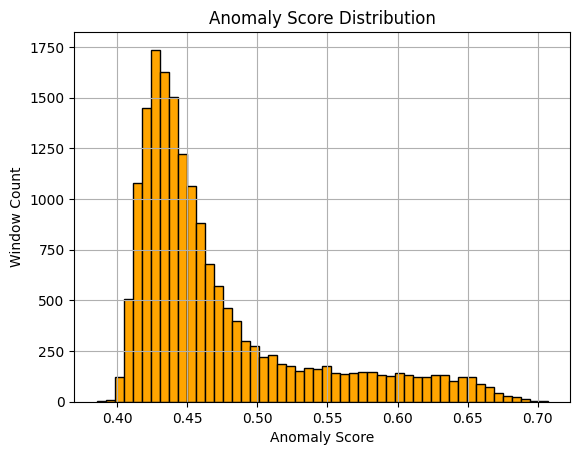

In [7]:
plt.hist(alerts['score'], bins=50, color='orange', edgecolor='black')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Window Count')
plt.grid(True)
plt.show()

## Anomalies by Engine and Cycle

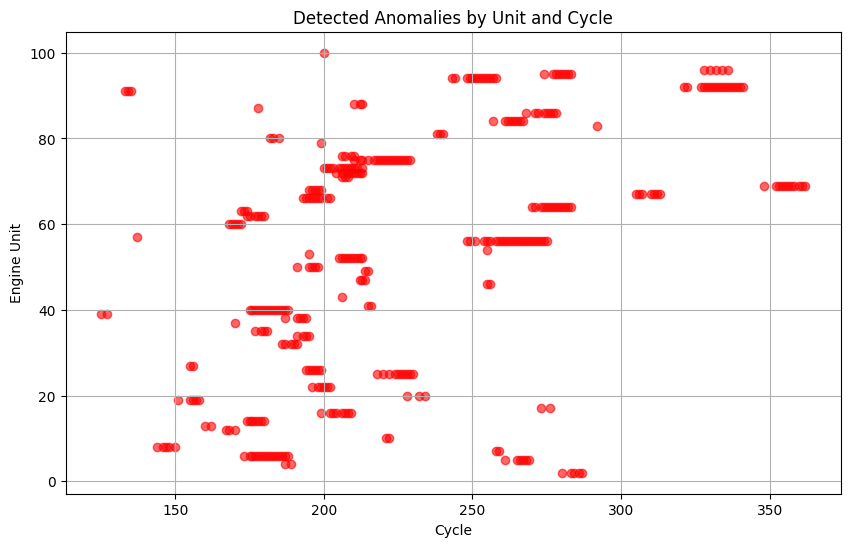

In [9]:
# Scatter plot of anomaly locations
anom_df = alerts[alerts['is_anomaly'] == True]
plt.figure(figsize=(10, 6))
plt.scatter(anom_df['cycle'], anom_df['unit'], color='red', alpha=0.6)
plt.xlabel('Cycle')
plt.ylabel('Engine Unit')
plt.title('Detected Anomalies by Unit and Cycle')
plt.grid(True)
plt.show()

## Sensor Trend with Anomalies
Shows how sensor 2 behaves for a single engine over time. Red points indicate anomaly detection.


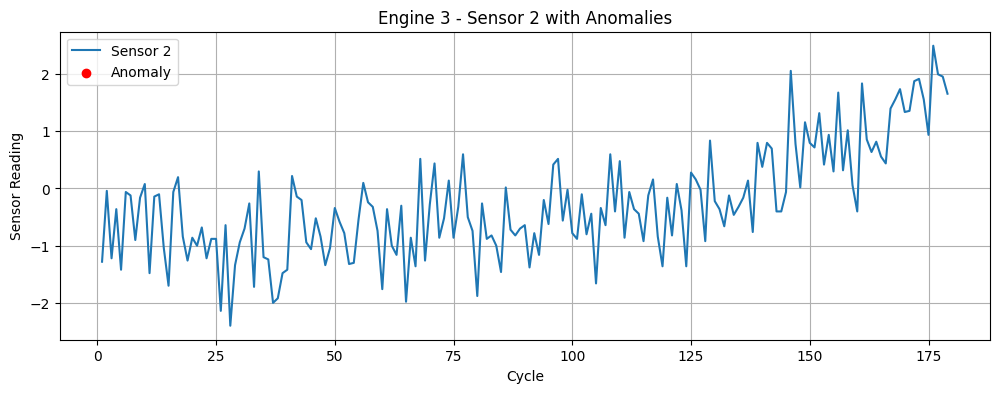

In [13]:
## Sensor trend with anomaly overlay for Engine 3
engine_id = 3
cleaned_df = pd.read_csv('dags/data/processed/cleaned_FD001.csv')
engine_df = cleaned_df[cleaned_df['unit_number'] == engine_id]
anomalies = alerts[(alerts['unit'] == engine_id) & (alerts['is_anomaly'] == True)]

plt.figure(figsize=(12, 4))
plt.plot(engine_df['time_in_cycles'], engine_df['sensor_2'], label="Sensor 2")
plt.scatter(anomalies['cycle'],
            engine_df.loc[engine_df['time_in_cycles'].isin(anomalies['cycle']), 'sensor_2'],
            color='red', label='Anomaly', zorder=5)
plt.title(f"Engine {engine_id} - Sensor 2 with Anomalies")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.grid(True)
plt.show()


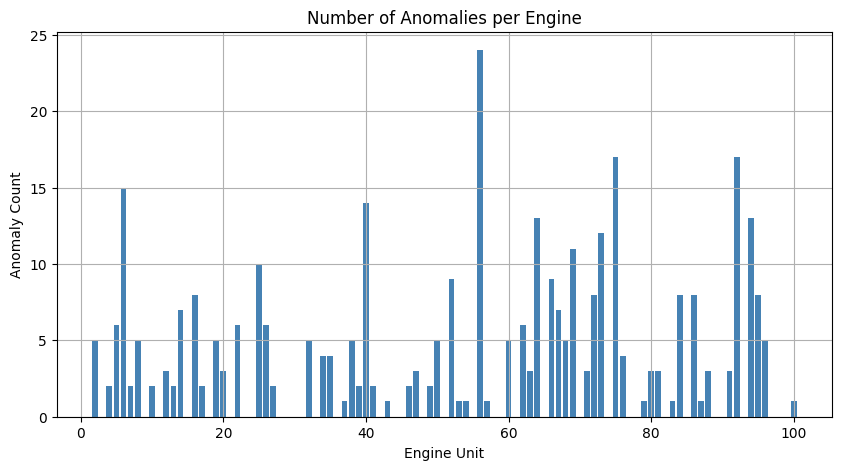

In [15]:
## Count of anomalies per engine unit
anom_counts = alerts[alerts['is_anomaly'] == True]['unit'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(anom_counts.index, anom_counts.values, color='steelblue')
plt.title("Number of Anomalies per Engine")
plt.xlabel("Engine Unit")
plt.ylabel("Anomaly Count")
plt.grid(True)
plt.show()


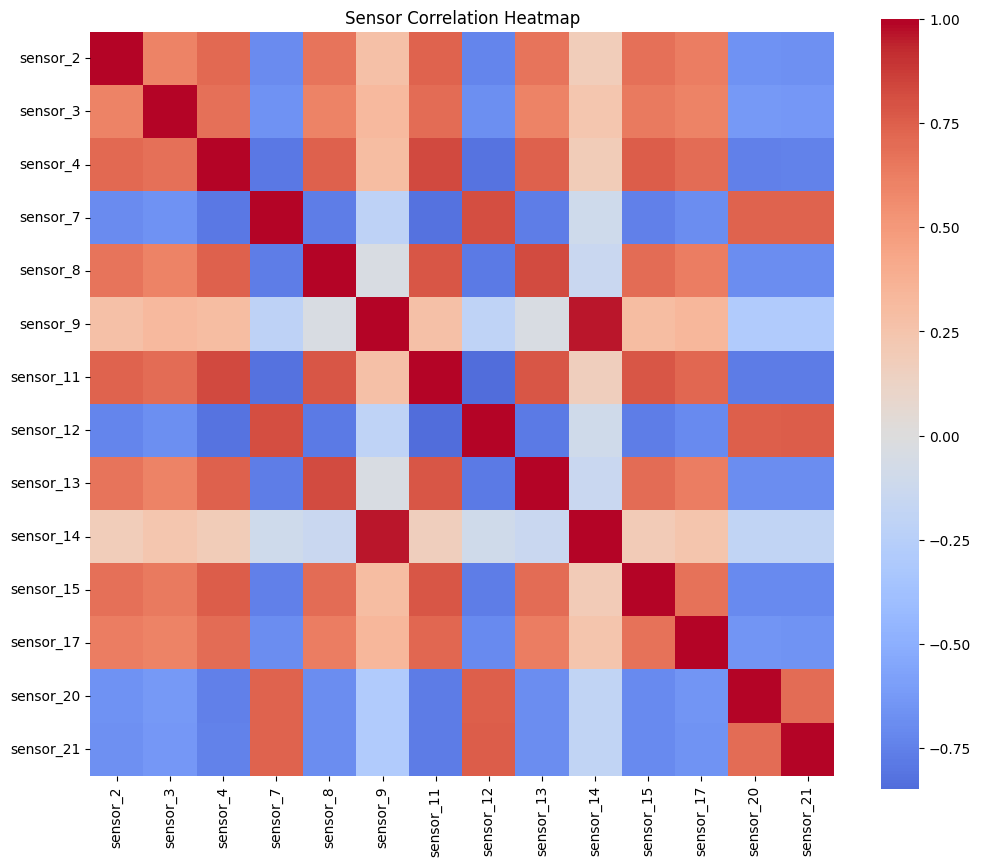

In [16]:
## Correlation heatmap across all sensor features
import seaborn as sns

sensor_cols = [c for c in cleaned_df.columns if 'sensor' in c]
corr = cleaned_df[sensor_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, annot=False)
plt.title("Sensor Correlation Heatmap")
plt.show()
